In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from BS_pricer import BS_pricer
from Parameters import Option_param
from IPython.display import display
from Processes import Diffusion_process
def display_matrix(m):
    display(sympy.Matrix(m))
import sympy

sympy.init_printing()

In [33]:
S0 = 100
T = 1
mu = 0.05
sigma = 0.2
lam = 1
I = 20
m = 0
v = 0.3
paths = 10
K = 90
df = np.exp(-mu*T)

In [34]:
def matrix(paths):
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)

        X[0] = np.log(S0)
        S[0] = S0
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m,v,N))
    
            if N == 0:
                M = 0
    
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                    
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix

S = matrix(paths)
S.shape

In [35]:
H = np.maximum(K - S, 0)  # intrinsic values for put option
V = np.zeros_like(H)  # value matrix
V[:, -1] = H[:, -1] # set value at maturity equal to intrinsic value

# Valuation by LS Method
for t in range(I - 2, 0, -1): #start at t = I-2 and go backwards (since we already set t = I-1 to intrinsic value)
    good_paths = H[:, t] > 0  # paths where the intrinsic value is positive
    # the regression is performed only on these paths

    rg = np.polyfit(S[good_paths, t], V[good_paths, t + 1] * df, 3)  # polynomial regression
    C = np.polyval(rg, S[good_paths, t])  # evaluation of regression

    exercise = np.zeros(len(good_paths), dtype=bool)  # initialize
    exercise[good_paths] = H[good_paths, t] > C  # paths where it is optimal to exercise

    V[exercise, t] = H[exercise, t]  # set V equal to H where it is optimal to exercise
    V[exercise, t + 1 :] = 0  # set future cash flows, for that path, equal to zero
    discount_path = V[:, t] == 0  # paths where we didn't exercise
    V[discount_path, t] = V[discount_path, t + 1] * df  # set V[t] in continuation region

V0 = np.mean(V[:, 1]) * df  # discounted expectation of V[t=1]
print('The value of the American put option is: ', V0)

V.shape

/Users/philipgadereumert/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/philipgadereumert/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/philipgadereumert/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/philipgadereumert/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/philipgadereumert/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_

The value of the American put option is:  8.348995287153524


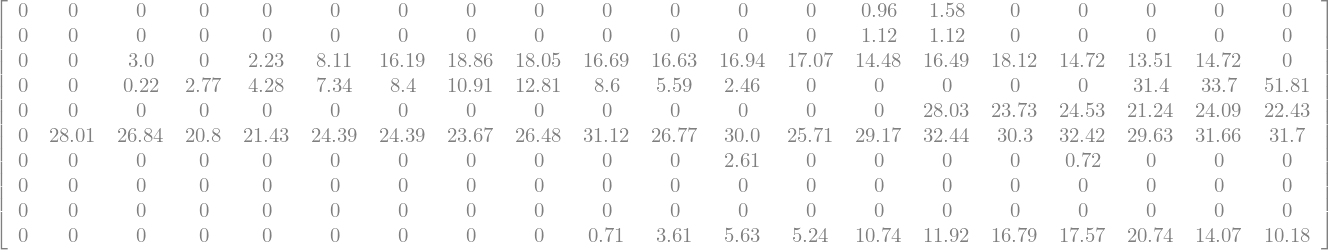

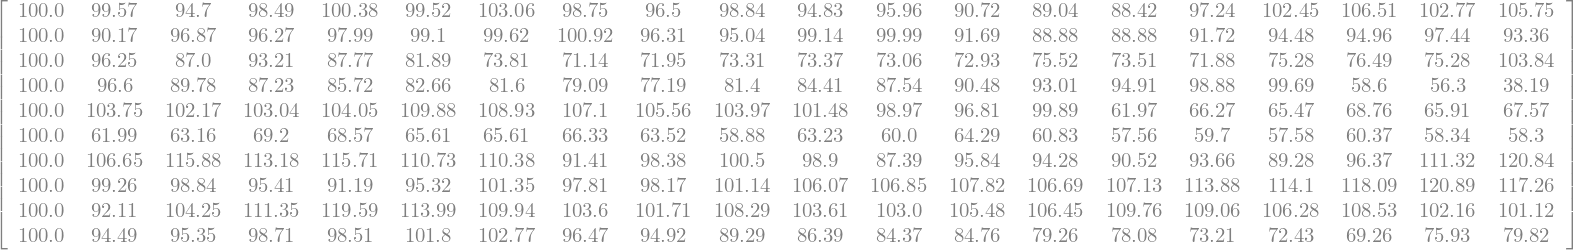

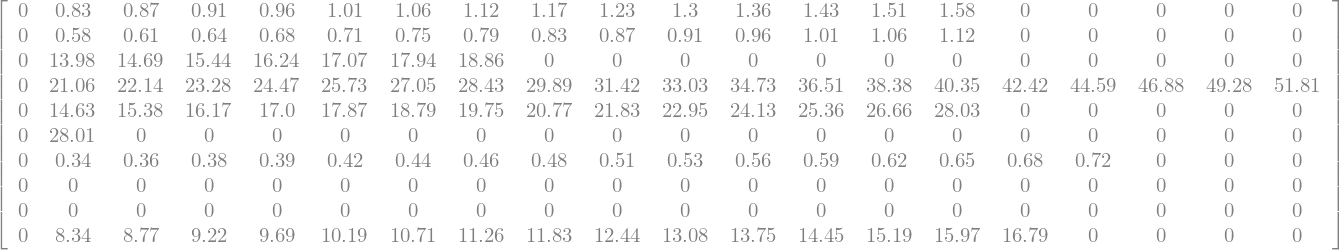

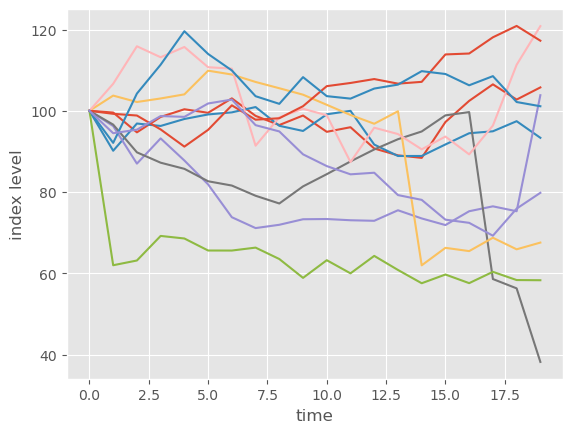

In [36]:
if I <= 20 and paths <= 10:
    plt.plot(S.T, lw=1.5)
    plt.xlabel('time')
    plt.ylabel('index level')

    display_matrix(H.round(2))
    display_matrix(S.round(2))
    display_matrix(V.round(2))